In [16]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 24 07:49:46 2021

@author: hwicaksono
"""

"""
Regression
"""

#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange


from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.simplefilter('ignore')

# Functions for later reuses

In [17]:
# Function to calculate metrics
def calculate_metrics(df, method, y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df.loc[method] = [mae, mse, rmse]

In [18]:
# Function to calculate cross validation
def calculate_cross_validation_scores (df, model, method, X, y):
    my_cv = 10
    mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=my_cv).mean()
    mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=my_cv).mean()
    rmse = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=my_cv).mean()
    df.loc[method] = [mae, mse, rmse]

# Data import and basic exploration

In [19]:
#Import the dataset
dataset = pd.read_csv(r'..\Datasets\Fish.csv')
dataset


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [20]:
# Find missing values
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
display(missing_value_df)

,column_name,percent_missing
Species,Species,0.0
Weight,Weight,0.0
Length1,Length1,0.0
Length2,Length2,0.0
Length3,Length3,0.0
Height,Height,0.0
Width,Width,0.0


In [21]:
# Count unique values of all categorical columns
categorical_cols = ['Species']
cat_cols_unique_counts_df = pd.DataFrame(columns = ['UniqueValuesCount'], index = categorical_cols)
for col in categorical_cols:
    cat_cols_unique_counts_df.loc[col] = dataset[col].nunique()
display(cat_cols_unique_counts_df)

,UniqueValuesCount
Species,7


<AxesSubplot:xlabel='Species', ylabel='Weight'>

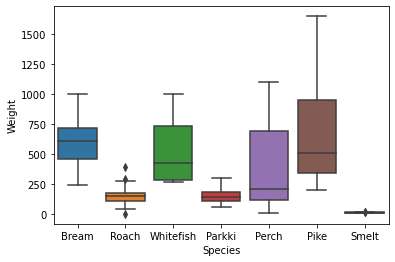

In [22]:
sns.boxplot(x='Species', y='Weight', data=dataset)


# Preprocessing

In [23]:
# for columns having unique values > 2, do one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe_cols = ['Species']
ohe = OneHotEncoder()
ct = make_column_transformer(
     (ohe, ohe_cols),
    remainder = 'passthrough'
)
ct.fit_transform(dataset)
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)


# one hot encode columns
for col in ohe_cols:
    dataset = encode_and_bind(dataset, col)


# delete the origin columns
for col in ohe_cols:
    del dataset[col]
    
display(dataset)

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [24]:
# for columns having unique values = 2, do label encoding

from sklearn.preprocessing import LabelEncoder
# here is the list of the names of the categorical columns
le_cols =  []
le = LabelEncoder()
for col in le_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
display(dataset)

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


# Exploratory data analysis

<Figure size 720x720 with 0 Axes>

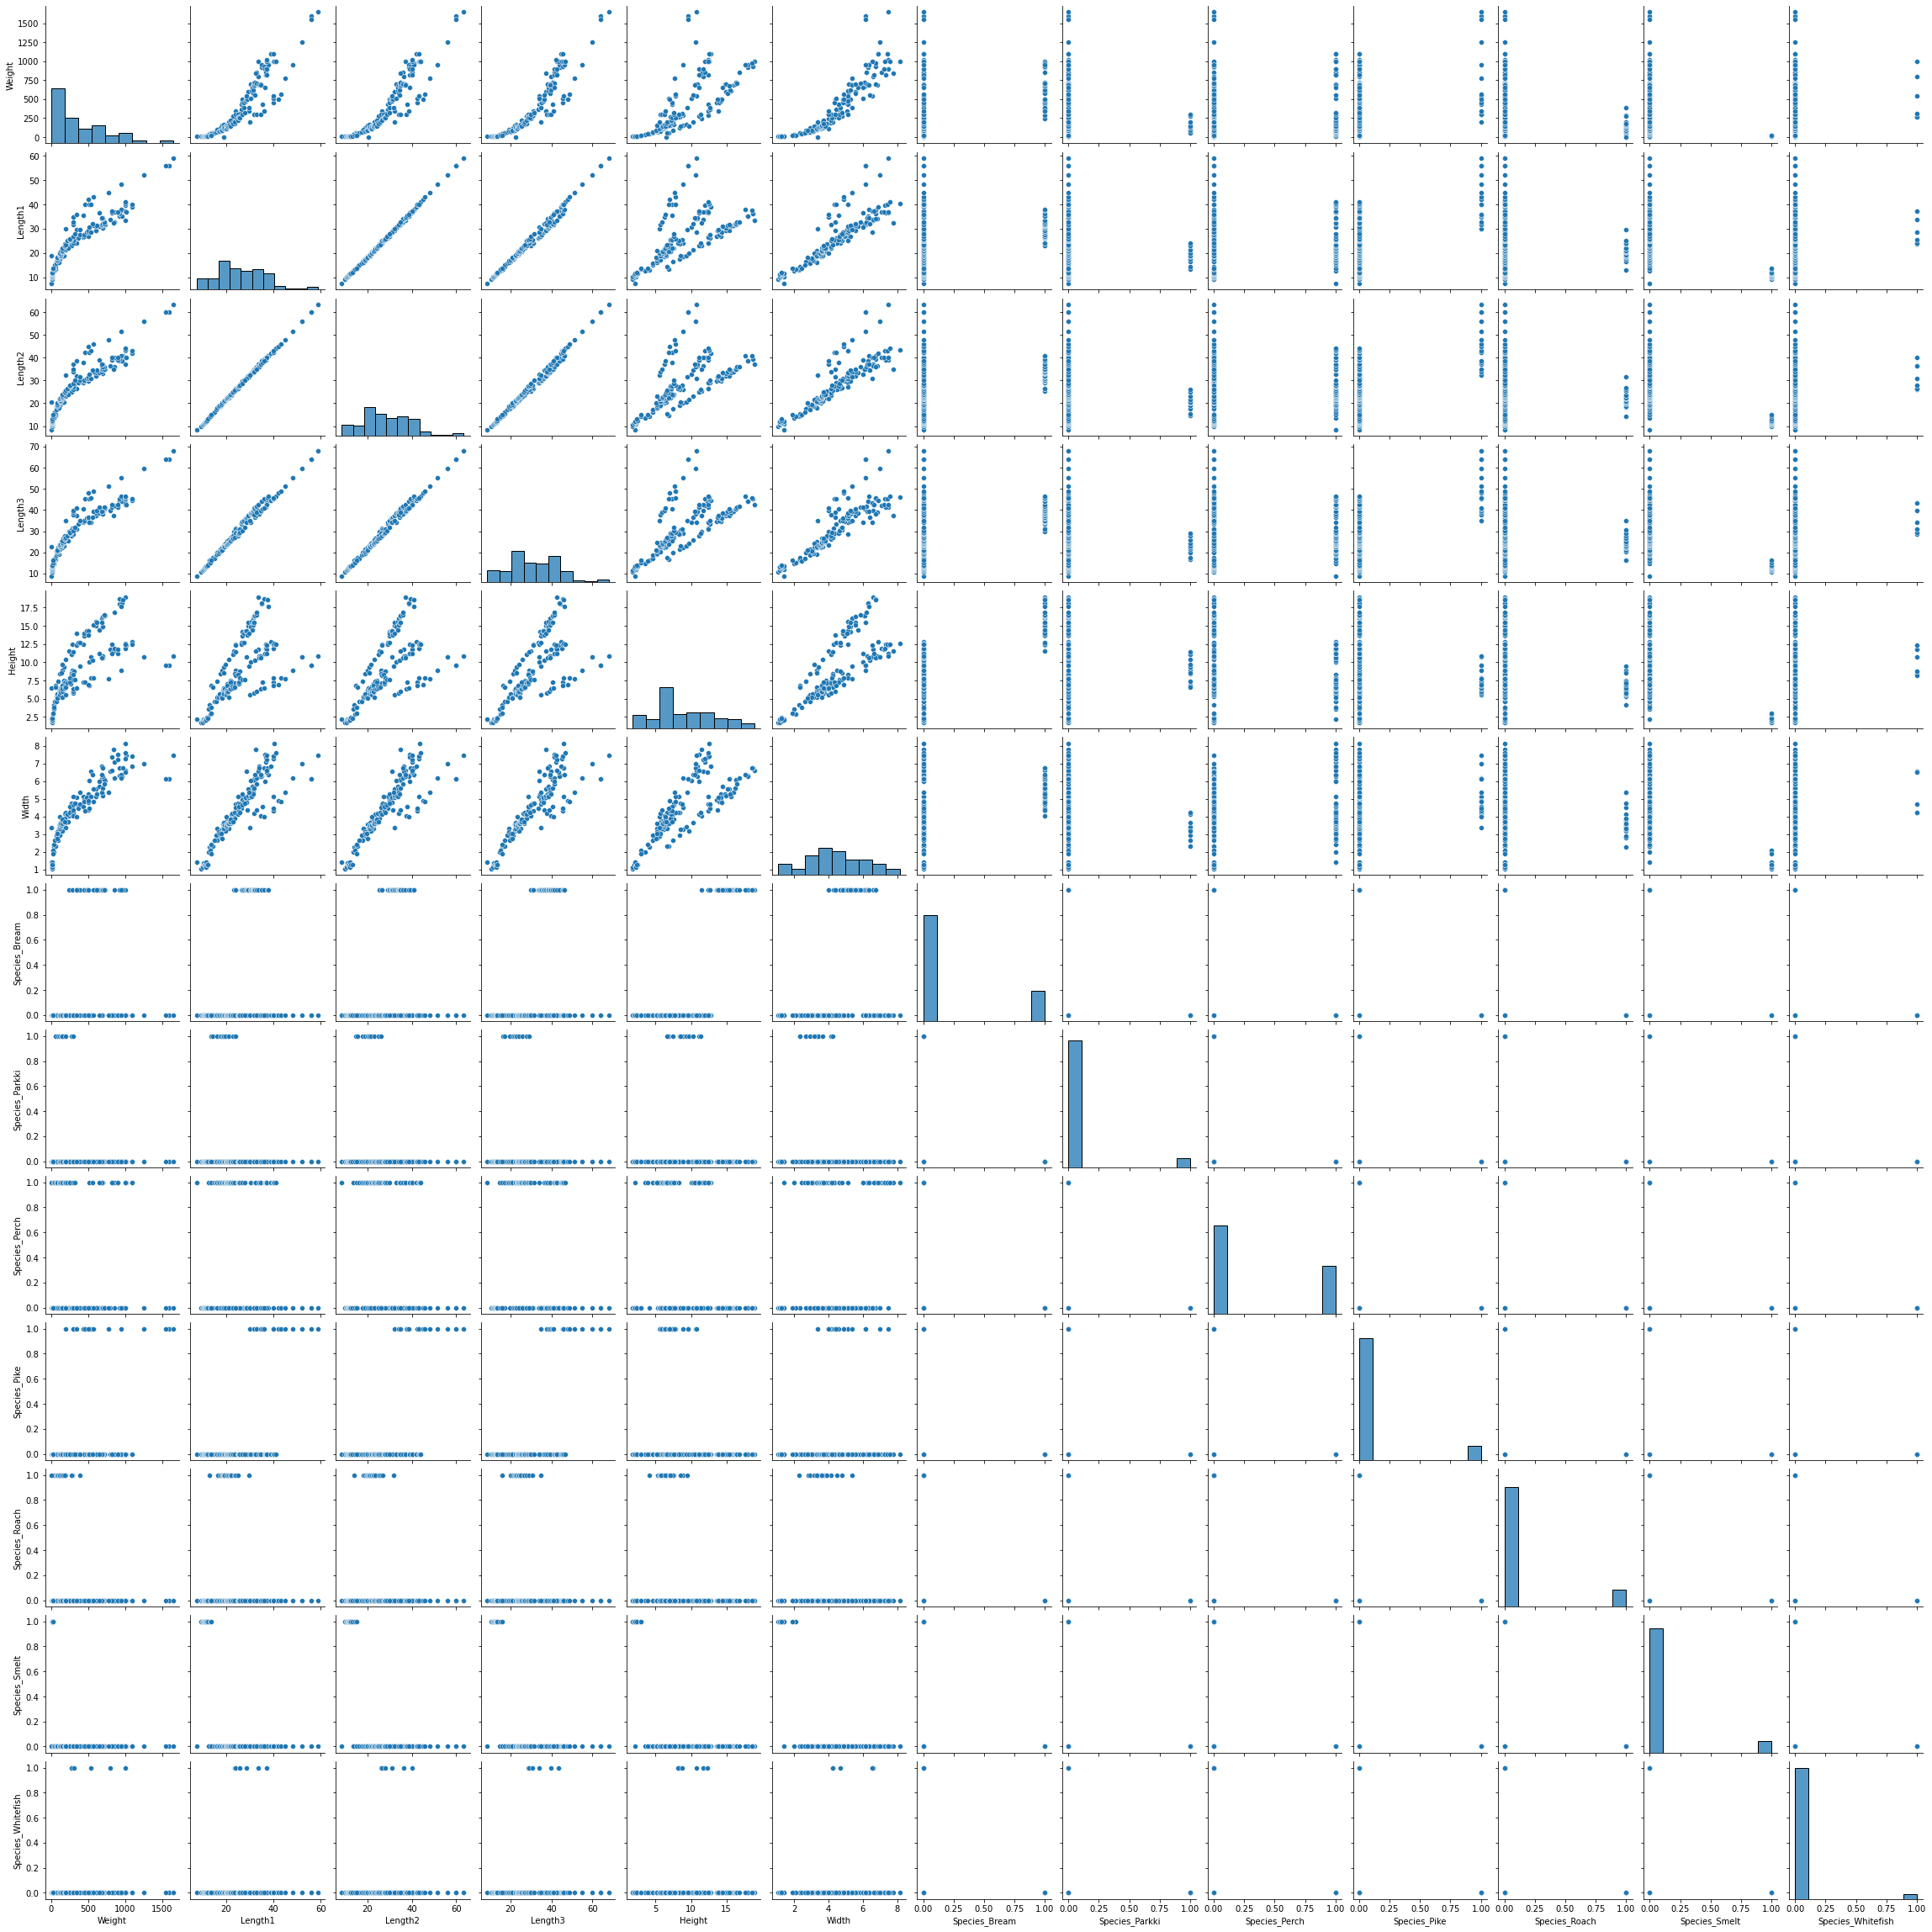

In [25]:
# Exploratory data analytics
plt.figure(figsize=(10, 10))
sns.pairplot(dataset)
plt.show()


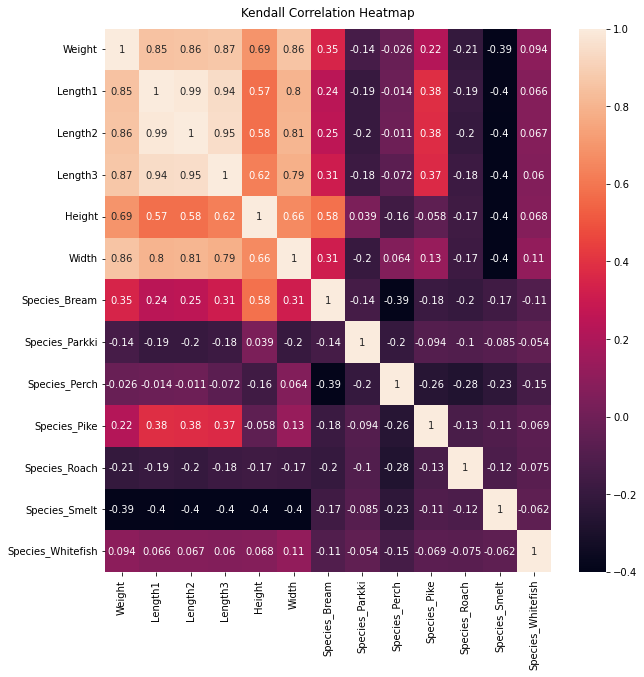

In [26]:
# Draw the correlation heatmaps using seaborn
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(dataset.corr(method='kendall'), annot=True)
heatmap.set_title('Kendall Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

# Get X and y, and then split the data

In [27]:
# Get X (independent variables) and y (dependent variable)
y_label = 'Weight'
X = dataset.loc[:, dataset.columns != y_label]
display(pd.DataFrame(X))
y = dataset.loc[:, y_label]
display(pd.DataFrame(y))

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


In [28]:
my_test_size = 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, shuffle=False)
X_train.describe()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0,127.000000,127.0,127.000000
mean,25.610236,27.826772,30.770079,9.856960,4.642162,0.275591,0.086614,0.433071,0.0,0.157480,0.0,0.047244
std,7.220757,7.746381,8.692784,4.060827,1.465072,0.448581,0.282383,0.497463,0.0,0.365696,0.0,0.213001
min,7.500000,8.400000,8.800000,2.112000,1.408000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,20.000000,22.000000,23.500000,6.392000,3.540900,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,25.000000,26.500000,29.200000,8.876800,4.335000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,31.450000,34.250000,38.650000,12.637000,5.789550,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000
max,40.200000,43.500000,46.500000,18.957000,8.142000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


# Linear Regression

In [29]:
# fit Simple Linear Regression to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slopes/coefficients
display(pd.DataFrame(regressor.coef_))

-595.2838692517612


,0
0,14.599568
1,34.296313
2,-39.746630
3,63.734113
4,54.524435
5,-104.012333
6,-62.041467
7,59.479621
8,0.000000
9,48.319745


In [30]:
# predict test result
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,931.202096
1,106.215573
2,121.668628
3,157.731829
4,230.080609
5,330.674926
6,245.583855
7,337.486691
8,315.930255
9,420.426948


In [31]:
# create error dataframe
error_df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE'], index = ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'KNN Regression', 'Support Vector Regression', 'PLS Regression'])
display(error_df)


,MAE,MSE,RMSE
Linear Regression,NaN,NaN,NaN
Multiple Linear Regression,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


In [32]:
# create cross valudation dataframe
cv_df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE'], index = ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'KNN Regression', 'Support Vector Regression', 'PLS Regression'])
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,NaN,NaN,NaN
Multiple Linear Regression,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


In [33]:
method = 'Linear Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,NaN,NaN,NaN
Polynomial Regression,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


# Multiple Linear Regression

In [34]:
# === Step 3: Backward Elimination to optimize the model ===
import statsmodels.api as sm

# add the dummy variable ( X-zero) and set the values to ones for both training and test set
X_opt_train = sm.add_constant(X_train)
display(X_opt_train)

X_opt_test = sm.add_constant(X_test)
display(X_opt_test)

,const,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,1.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,1.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,1.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,1.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,1.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1.0,37.1,40.0,42.5,11.1350,6.6300,0,0,1,0,0,0,0
123,1.0,39.0,42.0,44.6,12.8002,6.8684,0,0,1,0,0,0,0
124,1.0,39.8,43.0,45.2,11.9328,7.2772,0,0,1,0,0,0,0
125,1.0,40.1,43.0,45.5,12.5125,7.4165,0,0,1,0,0,0,0


,const,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
127,1.0,41.1,44.0,46.6,12.4888,7.5958,0,0,1,0,0,0,0
128,1.0,30.0,32.3,34.8,5.5680,3.3756,0,0,0,1,0,0,0
129,1.0,31.7,34.0,37.8,5.7078,4.1580,0,0,0,1,0,0,0
130,1.0,32.7,35.0,38.8,5.9364,4.3844,0,0,0,1,0,0,0
131,1.0,34.8,37.3,39.8,6.2884,4.0198,0,0,0,1,0,0,0
132,1.0,35.5,38.0,40.5,7.2900,4.5765,0,0,0,1,0,0,0
133,1.0,36.0,38.5,41.0,6.3960,3.9770,0,0,0,1,0,0,0
134,1.0,40.0,42.5,45.5,7.2800,4.3225,0,0,0,1,0,0,0
135,1.0,40.0,42.5,45.5,6.8250,4.4590,0,0,0,1,0,0,0
136,1.0,40.1,43.0,45.8,7.7860,5.1296,0,0,0,1,0,0,0


In [35]:
# the sm.OLS (ordinary least square) function requires constants
model=sm.OLS(y_train,X_opt_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           2.15e-68
Time:                        07:20:19   Log-Likelihood:                -726.53
No. Observations:                 127   AIC:                             1473.
Df Residuals:                     117   BIC:                             1501.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -496.0699     48.604    -10.206      0.000    -592.328    -399.812
Length1              14.5996     34.097      0.428      0.669     -52.927      82.126
Length2              34.2963     45.775      0.749      0.455     -56.359     124.952
Length3             -39.7466     30.601     -1.299      0.197    -100.350      20.857
Height               63.7341     13.282      4.798      0.000      37.429      90.039
Width                54.5244     21.714      2.511      0.013      11.521      97.528
Species_Bream      -203.2263     75.147     -2.704      0.008    -352.051     -54.402
Species_Parkki     -161.2554     30.189     -5.342      0.000    -221.043    -101.468
Species_Perch       -39.7344     42.909     -0.926      0.356    -124.713      45.244
Species_Pike       6.413e-15   4.93e-15      1.299      0.196   -3.36e-15    1.62e-14
Species_Roach       -50.8942     24.751     -2.056      0.042     -99.912      -1.876
Species_Smelt              0          0        nan        nan           0           0
Species_Whitefish   -40.9595     33.944     -1.207      0.230    -108.183      26.264
==============================================================================
Omnibus:                       22.751   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.791
Skew:                           0.932   Prob(JB):                     1.25e-07
Kurtosis:                       4.591   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
# Remove the variable having highest p value
del X_opt_train ['Length1']
del X_opt_test ['Length1']

In [37]:
# call OLS function
model=sm.OLS(y_train,X_opt_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.46e-69
Time:                        07:20:19   Log-Likelihood:                -726.63
No. Observations:                 127   AIC:                             1471.
Df Residuals:                     118   BIC:                             1497.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -503.4250     45.310    -11.111      0.000    -593.151    -413.699
Length2              48.4227     31.622      1.531      0.128     -14.198     111.044
Length3             -39.5144     30.490     -1.296      0.198     -99.893      20.864
Height               61.9659     12.580      4.926      0.000      37.053      86.878
Width                54.6450     21.637      2.526      0.013      11.798      97.492
Species_Bream      -203.8407     74.873     -2.722      0.007    -352.109     -55.572
Species_Parkki     -157.7322     28.945     -5.449      0.000    -215.051    -100.413
Species_Perch       -44.2250     41.463     -1.067      0.288    -126.333      37.883
Species_Pike       3.592e-14   1.83e-14      1.958      0.053   -4.16e-16    7.23e-14
Species_Roach       -51.1989     24.655     -2.077      0.040    -100.023      -2.375
Species_Smelt              0          0        nan        nan           0           0
Species_Whitefish   -46.4281     31.340     -1.481      0.141    -108.490      15.634
==============================================================================
Omnibus:                       24.553   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.560
Skew:                           0.979   Prob(JB):                     1.90e-08
Kurtosis:                       4.698   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
# Remove the variable having highest p value
del X_opt_train['Length3']
del X_opt_test['Length3']
X_opt_test

,const,Length2,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
127,1.0,44.0,12.4888,7.5958,0,0,1,0,0,0,0
128,1.0,32.3,5.5680,3.3756,0,0,0,1,0,0,0
129,1.0,34.0,5.7078,4.1580,0,0,0,1,0,0,0
130,1.0,35.0,5.9364,4.3844,0,0,0,1,0,0,0
131,1.0,37.3,6.2884,4.0198,0,0,0,1,0,0,0
132,1.0,38.0,7.2900,4.5765,0,0,0,1,0,0,0
133,1.0,38.5,6.3960,3.9770,0,0,0,1,0,0,0
134,1.0,42.5,7.2800,4.3225,0,0,0,1,0,0,0
135,1.0,42.5,6.8250,4.4590,0,0,0,1,0,0,0
136,1.0,43.0,7.7860,5.1296,0,0,0,1,0,0,0


In [39]:
# call OLS function
model=sm.OLS(y_train,X_opt_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     276.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.94e-70
Time:                        07:20:19   Log-Likelihood:                -727.52
No. Observations:                 127   AIC:                             1471.
Df Residuals:                     119   BIC:                             1494.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -548.5837     29.045    -18.888      0.000    -606.095    -491.073
Length2               7.9134      4.803      1.648      0.102      -1.597      17.423
Height               58.9319     12.396      4.754      0.000      34.387      83.477
Width                52.7714     21.650      2.437      0.016       9.902      95.641
Species_Bream      -276.7871     49.515     -5.590      0.000    -374.831    -178.743
Species_Parkki     -155.7353     28.986     -5.373      0.000    -213.131     -98.339
Species_Perch        -4.8796     28.320     -0.172      0.863     -60.957      51.198
Species_Pike      -1.693e-14   7.64e-15     -2.216      0.029   -3.21e-14    -1.8e-15
Species_Roach       -63.2039     22.914     -2.758      0.007    -108.576     -17.832
Species_Smelt              0          0        nan        nan           0           0
Species_Whitefish   -47.9778     31.407     -1.528      0.129    -110.166      14.211
==============================================================================
Omnibus:                       25.938   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.759
Skew:                           1.031   Prob(JB):                     6.32e-09
Kurtosis:                       4.697   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
# Remove the variable having highest p value
del X_opt_train['Length2']
del X_opt_test['Length2']
X_opt_test

,const,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
127,1.0,12.4888,7.5958,0,0,1,0,0,0,0
128,1.0,5.5680,3.3756,0,0,0,1,0,0,0
129,1.0,5.7078,4.1580,0,0,0,1,0,0,0
130,1.0,5.9364,4.3844,0,0,0,1,0,0,0
131,1.0,6.2884,4.0198,0,0,0,1,0,0,0
132,1.0,7.2900,4.5765,0,0,0,1,0,0,0
133,1.0,6.3960,3.9770,0,0,0,1,0,0,0
134,1.0,7.2800,4.3225,0,0,0,1,0,0,0
135,1.0,6.8250,4.4590,0,0,0,1,0,0,0
136,1.0,7.7860,5.1296,0,0,0,1,0,0,0


In [41]:
# call OLS function
model=sm.OLS(y_train,X_opt_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     317.4
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           3.98e-71
Time:                        07:20:19   Log-Likelihood:                -728.96
No. Observations:                 127   AIC:                             1472.
Df Residuals:                     120   BIC:                             1492.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -536.9639     28.376    -18.923      0.000    -593.146    -480.782
Height               70.4334     10.316      6.827      0.000      50.008      90.859
Width                72.1853     18.292      3.946      0.000      35.968     108.403
Species_Bream      -306.4064     46.464     -6.594      0.000    -398.403    -214.410
Species_Parkki     -171.9618     27.456     -6.263      0.000    -226.323    -117.601
Species_Perch        21.3276     23.599      0.904      0.368     -25.396      68.051
Species_Pike      -5.877e-14   1.06e-14     -5.565      0.000   -7.97e-14   -3.79e-14
Species_Roach       -46.5661     20.715     -2.248      0.026     -87.581      -5.551
Species_Smelt              0          0        nan        nan           0           0
Species_Whitefish   -33.3571     30.342     -1.099      0.274     -93.431      26.717
==============================================================================
Omnibus:                       23.776   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.219
Skew:                           0.999   Prob(JB):                     1.01e-07
Kurtosis:                       4.449   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
regressor = LinearRegression()
regressor.fit(X_opt_train, y_train)
print(regressor.intercept_)
display(pd.DataFrame(regressor.coef_))

-644.3566284317483


,0
0,0.000000e+00
1,7.043340e+01
2,7.218525e+01
3,-1.990137e+02
4,-6.456906e+01
5,1.287204e+02
6,-4.263256e-14
7,6.082665e+01
8,0.000000e+00
9,7.403572e+01


In [43]:
# Predict test set result
y_pred = regressor.predict(X_opt_test)
display(pd.DataFrame(y_pred))

,0
0,912.297099
1,-8.514934
2,57.809395
3,90.253211
4,88.727025
5,199.458645
6,93.216129
7,180.419258
8,158.225348
9,274.319273


In [44]:
method = 'Multiple Linear Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,NaN,NaN,NaN
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


# Polynomial Regression

In [45]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
poly_reg.fit(X_poly_train, y_train)

PolynomialFeatures()

In [46]:
# the code to compare the results of polynomial regression to linear regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

# Predict test set result
y_pred = lin_reg_2.predict(X_poly_test)
display(pd.DataFrame(y_pred))

,0
0,1004.833984
1,-105.949219
2,1181.730469
3,1224.802734
4,-114.332031
5,151.964844
6,-227.595703
7,105.503906
8,187.914062
9,300.863281


In [47]:
method = 'Polynomial Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, lin_reg_2, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,NaN,NaN,NaN
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


# Lasso Regression

In [48]:
#Fitting lasso regression to dataset
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV


# define model
model = LassoCV(cv=10)
model.fit(X,y)
print('alpha: ' + str(model.alpha_))
print('score: ' + str(model.score(X,y)))

regressor = Lasso(alpha = model.alpha_)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

alpha: 331.5692410440511
score: 0.8455642737269695


,0
0,862.017958
1,512.684894
2,601.498385
3,631.102882
4,660.707379
5,681.430527
6,696.232775
7,829.453012
8,829.453012
9,838.334361


In [49]:
method = 'Lasso Regression'
calculate_metrics(error_df, method , y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,210.629,54432.2,233.307
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,-122.741,-24042.7,-138.148
Ridge Regression,NaN,NaN,NaN
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


# Ridge Regression

In [51]:
# Fitting ridge regression to dataset
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

# Define model
model = RidgeCV(cv=cv)
model.fit(X,y)

print('alpha : ' + str(model.alpha_))
print('score : ' + str(model.score(X,y)))

regressor = Ridge(alpha = model.alpha_)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

alpha : 1.0
score : 0.9339195693798


,0
0,938.049537
1,163.291560
2,180.826608
3,218.387452
4,297.147383
5,391.581278
6,314.660289
7,407.977593
8,392.133768
9,492.479453


In [52]:
method = 'Ridge Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,210.629,54432.2,233.307
Ridge Regression,255.88,107661,328.118
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,-122.741,-24042.7,-138.148
Ridge Regression,-144.227,-35977.2,-158.874
Elastic Net Regression,NaN,NaN,NaN
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


# Elastic Net Regression

In [53]:
#Fitting elastic net regression to dataset
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV


# define model
model = ElasticNetCV(cv=10)
# fit model
model.fit(X, y)

print('alpha : ' + str(model.alpha_))
print('l1 ratio: ' + str(model.l1_ratio_))
print('score: ' + str(model.score(X,y)))

regressor = ElasticNet(alpha=model.alpha_, l1_ratio=model.l1_ratio_)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

alpha : 57.67640333935979
l1 ratio: 0.5
score: 0.8567618823349982


,0
0,888.806663
1,502.900100
2,570.348107
3,601.950534
4,656.552906
5,682.879441
6,693.316264
7,824.299519
8,822.513812
9,836.872204


In [54]:
method = 'Elastic Net Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,210.629,54432.2,233.307
Ridge Regression,255.88,107661,328.118
Elastic Net Regression,208.078,52757.1,229.689
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,-122.741,-24042.7,-138.148
Ridge Regression,-144.227,-35977.2,-158.874
Elastic Net Regression,-121.741,-23339.8,-136.767
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


# Decision Tree Regression

In [55]:
#Fitting decision tree regression to dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(min_samples_split  = 2)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,1000.0
1,390.0
2,610.0
3,690.0
4,690.0
5,690.0
6,650.0
7,1000.0
8,1000.0
9,1000.0


In [56]:
method = 'Decision Tree Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,210.629,54432.2,233.307
Ridge Regression,255.88,107661,328.118
Elastic Net Regression,208.078,52757.1,229.689
Decision Tree Regression,213.194,93421.3,305.649
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,-122.741,-24042.7,-138.148
Ridge Regression,-144.227,-35977.2,-158.874
Elastic Net Regression,-121.741,-23339.8,-136.767
Decision Tree Regression,-86.1817,-17770.6,-141.295
Random Forest Regression,NaN,NaN,NaN
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


# Random Forest Regression

In [57]:
#Fitting random forest regression to dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,1037.650
1,434.730
2,537.470
3,579.100
4,575.480
5,583.510
6,584.330
7,783.560
8,782.660
9,852.460


In [58]:
method = 'Random Forest Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,210.629,54432.2,233.307
Ridge Regression,255.88,107661,328.118
Elastic Net Regression,208.078,52757.1,229.689
Decision Tree Regression,213.194,93421.3,305.649
Random Forest Regression,171.566,66085,257.07
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,-122.741,-24042.7,-138.148
Ridge Regression,-144.227,-35977.2,-158.874
Elastic Net Regression,-121.741,-23339.8,-136.767
Decision Tree Regression,-86.1817,-17770.6,-141.295
Random Forest Regression,-66.283,-11983.2,-82.3214
Gradient Boosting Regression,NaN,NaN,NaN
KNN Regression,NaN,NaN,NaN


# Gradient Boosting

In [59]:
#Fitting gradient boosting regression to dataset
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(max_depth=4, n_estimators=100, learning_rate=0.1)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,1020.444736
1,378.078039
2,471.094001
3,553.507226
4,511.312345
5,539.108271
6,500.901253
7,665.656794
8,666.843158
9,672.822842


In [60]:
method = 'Gradient Boosting Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,210.629,54432.2,233.307
Ridge Regression,255.88,107661,328.118
Elastic Net Regression,208.078,52757.1,229.689
Decision Tree Regression,213.194,93421.3,305.649
Random Forest Regression,171.566,66085,257.07
Gradient Boosting Regression,143.799,61042.7,247.068
KNN Regression,NaN,NaN,NaN


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,-122.741,-24042.7,-138.148
Ridge Regression,-144.227,-35977.2,-158.874
Elastic Net Regression,-121.741,-23339.8,-136.767
Decision Tree Regression,-86.1817,-17770.6,-141.295
Random Forest Regression,-66.283,-11983.2,-82.3214
Gradient Boosting Regression,-66.0092,-12892.1,-74.7949
KNN Regression,NaN,NaN,NaN


# KNN Regression

In [61]:
#Fitting KNN regression to dataset
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=10)
regressor.fit(X_train, y_train)

#prediction of test values
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,973.50
1,406.60
2,641.50
3,652.50
4,732.10
5,766.50
6,769.50
7,943.50
8,943.50
9,943.50


In [62]:
method = 'KNN Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,210.629,54432.2,233.307
Ridge Regression,255.88,107661,328.118
Elastic Net Regression,208.078,52757.1,229.689
Decision Tree Regression,213.194,93421.3,305.649
Random Forest Regression,171.566,66085,257.07
Gradient Boosting Regression,143.799,61042.7,247.068
KNN Regression,226.584,93783.5,306.241


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,-122.741,-24042.7,-138.148
Ridge Regression,-144.227,-35977.2,-158.874
Elastic Net Regression,-121.741,-23339.8,-136.767
Decision Tree Regression,-86.1817,-17770.6,-141.295
Random Forest Regression,-66.283,-11983.2,-82.3214
Gradient Boosting Regression,-66.0092,-12892.1,-74.7949
KNN Regression,-90.4813,-25031.2,-113.125


# Support Vector Regression 

In [63]:
# Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

#prediction of test dataset
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,956.069232
1,439.840942
2,508.880371
3,546.481401
4,612.813880
5,656.384000
6,651.448647
7,795.468049
8,790.725414
9,823.142327


In [64]:
method = 'Support Vector Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,210.629,54432.2,233.307
Ridge Regression,255.88,107661,328.118
Elastic Net Regression,208.078,52757.1,229.689
Decision Tree Regression,213.194,93421.3,305.649
Random Forest Regression,171.566,66085,257.07
Gradient Boosting Regression,143.799,61042.7,247.068
KNN Regression,226.584,93783.5,306.241


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,-122.741,-24042.7,-138.148
Ridge Regression,-144.227,-35977.2,-158.874
Elastic Net Regression,-121.741,-23339.8,-136.767
Decision Tree Regression,-86.1817,-17770.6,-141.295
Random Forest Regression,-66.283,-11983.2,-82.3214
Gradient Boosting Regression,-66.0092,-12892.1,-74.7949
KNN Regression,-90.4813,-25031.2,-113.125


# Partial Least Squares (PLS) Regression

In [65]:
# Fitting PLS Regression to dataset
from sklearn.cross_decomposition import PLSRegression, PLSSVD
regressor = PLSRegression(n_components = 2)
regressor.fit(X_train, y_train)

#prediction of test dataset
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,967.318256
1,388.766700
2,477.432310
3,514.848470
4,546.463682
5,600.508517
6,574.719477
7,701.053075
8,702.607595
9,751.754315


In [66]:
method = 'PLS Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Linear Regression,309.91,141188,375.749
Multiple Linear Regression,419.575,230851,480.47
Polynomial Regression,333.094,181205,425.682
Lasso Regression,210.629,54432.2,233.307
Ridge Regression,255.88,107661,328.118
Elastic Net Regression,208.078,52757.1,229.689
Decision Tree Regression,213.194,93421.3,305.649
Random Forest Regression,171.566,66085,257.07
Gradient Boosting Regression,143.799,61042.7,247.068
KNN Regression,226.584,93783.5,306.241


,MAE,MSE,RMSE
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
Polynomial Regression,-181.907,-66666.7,-199.618
Lasso Regression,-122.741,-24042.7,-138.148
Ridge Regression,-144.227,-35977.2,-158.874
Elastic Net Regression,-121.741,-23339.8,-136.767
Decision Tree Regression,-86.1817,-17770.6,-141.295
Random Forest Regression,-66.283,-11983.2,-82.3214
Gradient Boosting Regression,-66.0092,-12892.1,-74.7949
KNN Regression,-90.4813,-25031.2,-113.125


In [67]:
error_df.sort_values(by=['RMSE'], inplace=True)
error_df

,MAE,MSE,RMSE
Elastic Net Regression,208.078,52757.1,229.689
PLS Regression,220.555,53966,232.306
Lasso Regression,210.629,54432.2,233.307
Gradient Boosting Regression,143.799,61042.7,247.068
Random Forest Regression,171.566,66085,257.07
Support Vector Regression,246.158,66689.2,258.243
Decision Tree Regression,213.194,93421.3,305.649
KNN Regression,226.584,93783.5,306.241
Ridge Regression,255.88,107661,328.118
Linear Regression,309.91,141188,375.749


In [68]:
cv_df.sort_values(by=['RMSE'], ascending=False, inplace=True)
cv_df

,MAE,MSE,RMSE
Gradient Boosting Regression,-66.0092,-12892.1,-74.7949
Random Forest Regression,-66.283,-11983.2,-82.3214
KNN Regression,-90.4813,-25031.2,-113.125
Elastic Net Regression,-121.741,-23339.8,-136.767
Lasso Regression,-122.741,-24042.7,-138.148
Decision Tree Regression,-86.1817,-17770.6,-141.295
Support Vector Regression,-133.204,-31008,-148.157
Ridge Regression,-144.227,-35977.2,-158.874
Linear Regression,-181.907,-66666.7,-199.618
Multiple Linear Regression,-181.907,-66666.7,-199.618
